In [12]:

#import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model
import os
import numpy as np

%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from IPython import display

from io import BytesIO
from PIL import Image
from PIL import ImageOps


In [13]:
#transform to a format 
#the model can understand
def preprocess(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(64*64*3).reshape((1,64,64,3))
    
    c[0] = img
    return c

In [14]:
'''
LOAD MODEL
'''


model = load_model('helmet.h5')


In [79]:
webcam = cv2.VideoCapture(0) #Use camera 0


while True:
    (rval, im) = webcam.read()
    
            
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break

    frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       
        
        # Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

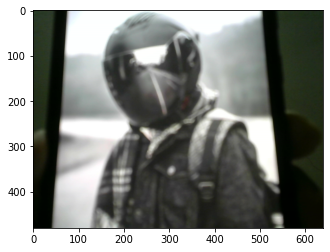

In [80]:
image1 = Image.fromarray(np.uint8(frame))
plt.imshow(image1)
plt.show()

In [81]:
# resize cifar10 image size(32, 32)
image = Image.fromarray(np.uint8(frame))
image = image.resize((64, 64))

resize_frame = np.asarray(image)


In [82]:
'''
PREDICTING
'''

image1 = preprocess(resize_frame)
 
ret = model.predict(image1, batch_size=1) 
 


In [83]:
ret

array([[0.40188643]], dtype=float32)

In [84]:
result=np.around(ret)

In [85]:
result

array([[0.]], dtype=float32)

In [86]:
if result == 1:
    prediction = 'without helmet'
else:
    prediction = 'with helmet'
    
prediction

'with helmet'